In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

%matplotlib inline

In [17]:
diabetes_dataframe = pd.read_csv("./Diabetes dataset/Clean_diabetes_dataset.csv")
diabetes_dataframe.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [18]:
corr_matrix = diabetes_dataframe.corr()
corr_matrix["Outcome"]*100


Unnamed: 0                   -2.868235
Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
SkinThickness                 3.067563
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

<Axes: >

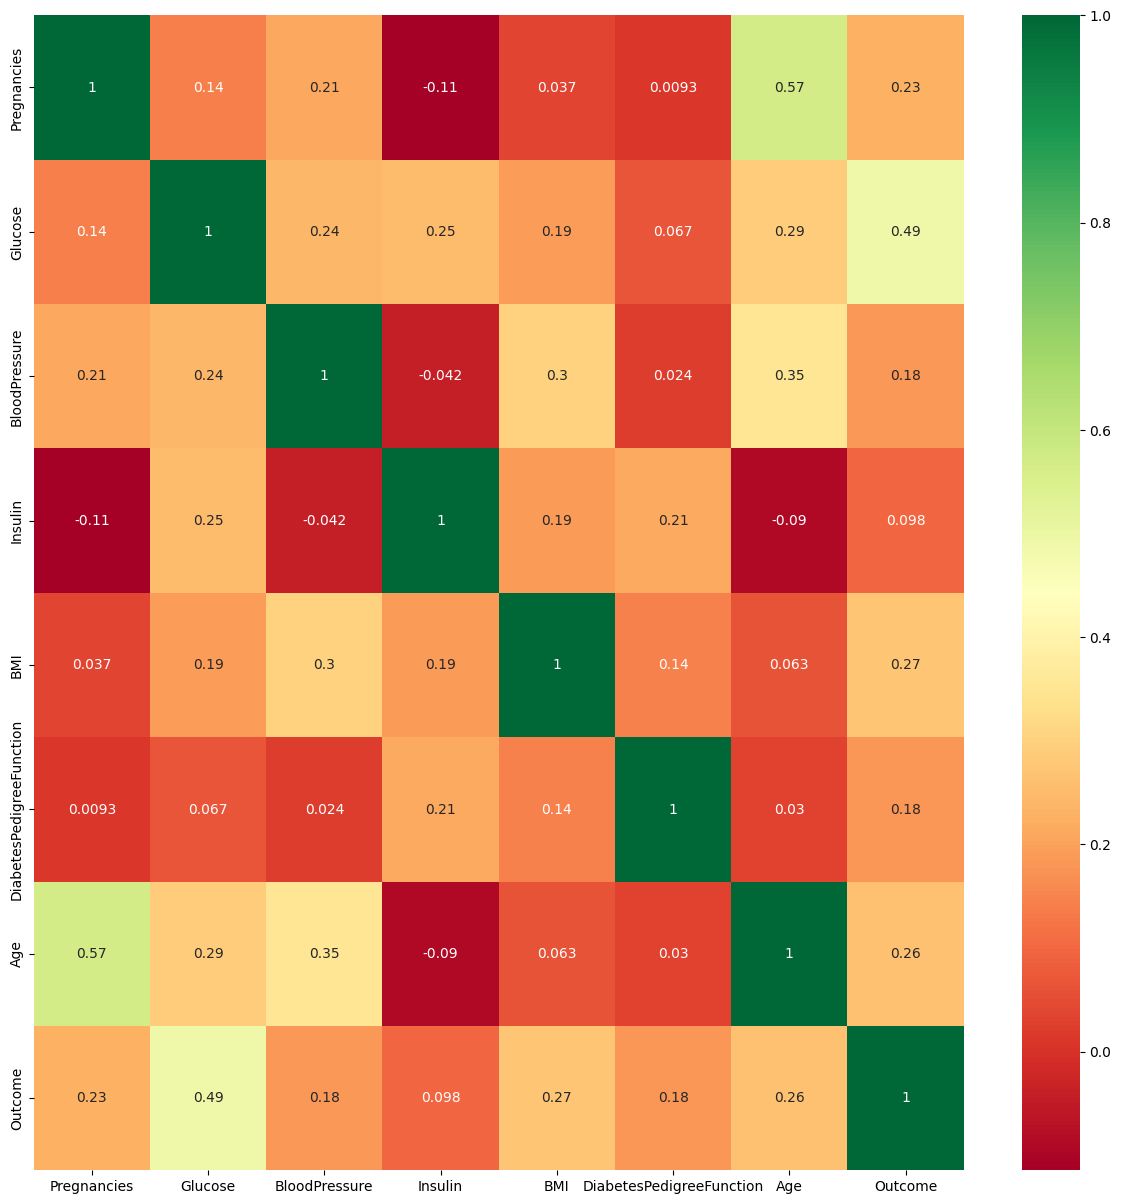

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(diabetes_dataframe.corr(), annot=True, cmap='RdYlGn')

In [20]:
diabetes_dataframe.drop( columns=["Unnamed: 0","SkinThickness"], inplace=True)

In [21]:
diabetes_dataframe.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,5,116,74,0,25.6,0.201,30,0


In [22]:
X = diabetes_dataframe.drop(['Outcome'], axis='columns')
y = diabetes_dataframe.Outcome
print(X.shape,y.shape)

(639, 7) (639,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
len(X_train),len(X_test)

(511, 128)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)
print("----------------------")
print(X_test_sc)

[[-8.79417944e-01  1.00420719e+00 -3.93266230e-01 ... -4.28419343e-01
  -3.23522803e-01  8.04213916e-01]
 [-1.18595449e+00  6.94707870e-01 -6.56646365e-01 ...  1.61600306e+00
   3.54370181e-03 -8.03165397e-01]
 [ 3.46728221e-01  7.57092274e-02  1.18701458e+00 ...  4.01646894e-01
  -5.58851142e-01  5.24259398e-04]
 ...
 [-5.72881403e-01 -6.12067043e-01  1.18701458e+00 ...  2.06177937e+00
  -1.20899554e+00 -8.92464248e-01]
 [-2.66344862e-01 -1.30623654e-01  1.33494041e-01 ... -8.89567252e-01
  -1.28876785e+00 -8.03165397e-01]
 [-8.79417944e-01 -9.62348401e-02  1.36260134e+00 ...  3.70903700e-01
  -1.08137544e-01  6.25616214e-01]]
----------------------
[[-2.66344862e-01 -1.26545450e+00 -1.27120001e+00 -6.14592851e-01
   3.40160506e-01 -3.75374810e-01 -7.13866546e-01]
 [-2.66344862e-01 -1.05912162e+00  1.33494041e-01  2.14053447e-01
  -2.59331776e-01  4.82177612e-01  4.47018513e-01]
 [ 1.26633784e+00 -4.40122975e-01  6.60254312e-01 -8.37214245e-01
  -1.15088440e+00  1.69870547e+00  8.9823

In [26]:
X_train_sc = pd.DataFrame(X_train_sc, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_test_sc = pd.DataFrame(X_test_sc, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_train_sc.describe().round(), X_test_sc.describe().round()

(       Pregnancies  Glucose  BloodPressure  Insulin    BMI  \
 count        511.0    511.0          511.0    511.0  511.0   
 mean          -0.0     -0.0           -0.0      0.0    0.0   
 std            1.0      1.0            1.0      1.0    1.0   
 min           -1.0     -3.0           -3.0     -1.0   -2.0   
 25%           -1.0     -1.0           -1.0     -1.0   -1.0   
 50%           -0.0     -0.0           -0.0     -0.0   -0.0   
 75%            1.0      1.0            1.0      1.0    1.0   
 max            3.0      3.0            3.0      3.0    3.0   
 
        DiabetesPedigreeFunction    Age  
 count                     511.0  511.0  
 mean                        0.0   -0.0  
 std                         1.0    1.0  
 min                        -1.0   -1.0  
 25%                        -1.0   -1.0  
 50%                        -0.0   -0.0  
 75%                         1.0    1.0  
 max                         3.0    3.0  ,
        Pregnancies  Glucose  BloodPressure  Insulin